Héctor Asorey de Pablos

<hr>

# PRÁCTICA 3: REDES NEURONALES

<hr>

Se plantea un problema de clasificación multiclase (3 clases) a resolver mediante redes neuronales.

Para esta tarea, se utilizará el dataset "star_class_clean.csv", que contiene 100000 observaciones del espacio tomadas por el SDSS (Sloan Digital Sky Survey) y que clasifica estas observaciones en 3 tipos, que son: Galxia, Estrella o Cuasar (galaxia recién nacida).

El dataset contiene 13 variables, que son las siguientes:

* alpha: ángulo de ascensión (float)
* delta: ángulo de declinación (float)
* u: filtro ultravioleta (float)
* g: filtro verde (float)
* r: filtro rojo (float)
* i: filtro infrarrojo cercano (float)
* z: filtro infrarrojo (float)
* field_ID: número de campo para identificar cada campo (int)
* spec_obj_ID: ID único utilizado para objetos espectroscópicos ópticos (int)
* redshift: valor redshift basado en el aumento de la longitud de onda (float)
* plate: identifica cada placa en SDSS (int)
* MJD: fecha juliana (float)
* fiber_ID: ID de fibra que identifica la fibra que apuntó la luza al plano focal en cada observación
* class: clase del objeto (galaxy, star, quasar object)

Este Dataset ha sido descargado de Kaggle y se han eliminado las columnas que no son relevantes para resolver el problema de clasificación. 

Fuente del Dataset:https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17

<hr>

### 1. LECTURA DE DATOS Y VISUALIZACIÓN DE LA DISTRIBUCIÓN DE LAS CLASES A CLASIFICAR



In [1]:
import pandas as pd

dataframe = pd.read_csv('./data/star_class_clean.csv')
dataframe

,alpha,delta,u,g,r,i,z,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,79,6.543777e+18,0.634794,5812,56354,171,GALAXY
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,119,1.176014e+19,0.779136,10445,58158,427,GALAXY
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,120,5.152200e+18,0.644195,4576,55592,299,GALAXY
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,214,1.030107e+19,0.932346,9149,58039,775,GALAXY
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,137,6.891865e+18,0.116123,6121,56187,842,GALAXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,581,1.055431e+19,0.000000,9374,57749,438,GALAXY
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,289,8.586351e+18,0.404895,7626,56934,866,GALAXY
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,308,3.112008e+18,0.143366,2764,54535,74,GALAXY
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,131,7.601080e+18,0.455040,6751,56368,470,GALAXY


In [2]:
dataframe['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [3]:
print(f'Número de valores únicos en field_ID: {len(dataframe["field_ID"].unique())}')
print(f'Número de valores únicos en spec_obj_ID: {len(dataframe["spec_obj_ID"].unique())}')
print(f'Número de valores únicos en redshift: {len(dataframe["redshift"].unique())}')
print(f'Número de valores únicos en plate: {len(dataframe["plate"].unique())}')      
print(f'Número de valores únicos en fiber_ID: {len(dataframe["fiber_ID"].unique())}')      

Número de valores únicos en field_ID: 856
Número de valores únicos en spec_obj_ID: 100000
Número de valores únicos en redshift: 99295
Número de valores únicos en plate: 6284
Número de valores únicos en fiber_ID: 1000


Nº de elementos de la clase Galaxia: 59445
Nº de elementos de la clase Cuasar: 18961
Nº de elementos de la clase Estrella: 21594


<AxesSubplot:xlabel='class', ylabel='Probability'>

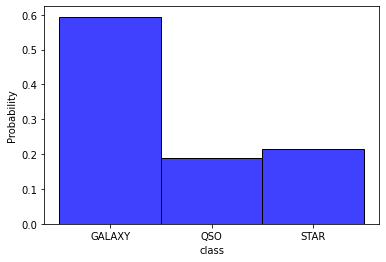

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print('Nº de elementos de la clase Galaxia: {}'.format(np.count_nonzero(dataframe['class'] == 'GALAXY')))
print('Nº de elementos de la clase Cuasar: {}'.format(np.count_nonzero(dataframe['class'] == 'QSO')))
print('Nº de elementos de la clase Estrella: {}'.format(np.count_nonzero(dataframe['class'] == 'STAR')))

sns.histplot(data=dataframe, x="class", discrete=True, stat='probability', bins=2, color = 'blue')

<hr>

### 2. TRANSFORMACIÓN Y NORMALIZACIÓN DE LOS DATOS



In [5]:
dataframe = dataframe.drop(['spec_obj_ID'], axis = 1)

In [6]:
from sklearn import preprocessing

classValues = dataframe['class'].values

le = preprocessing.LabelEncoder()     
classLabelized = le.fit_transform(classValues)

dataframe['class'] = classLabelized

In [7]:
dataframe['class'].unique()

array([0, 1, 2])

In [8]:
from sklearn.preprocessing import MinMaxScaler

target_col = 'class'
features_cols = dataframe.loc[:, dataframe.columns != target_col].columns.tolist()

min_max_scaler = MinMaxScaler()
dataframe[features_cols] = min_max_scaler.fit_transform(dataframe[features_cols])
dataframe.sample(5)

,alpha,delta,u,g,r,i,z,field_ID,redshift,plate,MJD,fiber_ID,class
79434,0.631318,0.689279,0.998859,0.998940,0.555278,0.501328,0.999128,0.107362,0.111043,0.662080,0.802021,0.801802,1
67505,0.339526,0.584457,0.998996,0.999311,0.592936,0.475270,0.999017,0.107362,0.097019,0.653530,0.787138,0.206206,0
6950,0.572757,0.816523,0.999021,0.998984,0.493884,0.416878,0.998930,0.085890,0.051419,0.533751,0.653741,0.602603,0
45576,0.664342,0.421539,0.998998,0.999015,0.518499,0.429285,0.998928,0.260736,0.070572,0.299161,0.507783,0.406406,0
2970,0.054825,0.179672,0.998751,0.998676,0.379317,0.327377,0.998717,0.485685,0.014500,0.010748,0.024713,0.168168,0


<hr>

### 3. TÉCNICAS DE EVALUACIÓN



In [9]:
from sklearn.model_selection import train_test_split

X = dataframe[features_cols]
y = dataframe[target_col]

# División de datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<hr>

## PRIMERA RED NEURONAL

Se va a realizar una primera red sencilla, sin utilizar ningún método de regularización



<hr>

### 4. ARQUITECTURA DE LA PRIMERA RED NEURONAL



In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3328      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 3)                 51        
                                                                 
Total params: 47,139
Trainable params: 47,139
Non-traina

<hr>

### 5. DEFINICIÓN DE LA FUNCIÓN DE PÉRDIDA Y OPTIMIZADOR DE LA PRIMERA RED NEURONAL



In [11]:
from tensorflow.keras import metrics

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

<hr>

### 6. ENTRENAMIENTO DE LA PRIMERA RED NEURONAL



In [12]:
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test), 
                    epochs=50, 
                    batch_size=int(X_train.shape[0]/100),
                    verbose=2)

Epoch 1/50
100/100 - 1s - loss: 0.8297 - accuracy: 0.6560 - val_loss: 0.6218 - val_accuracy: 0.7273 - 1s/epoch - 12ms/step
Epoch 2/50
100/100 - 0s - loss: 0.4707 - accuracy: 0.8026 - val_loss: 0.3304 - val_accuracy: 0.8790 - 352ms/epoch - 4ms/step
Epoch 3/50
100/100 - 0s - loss: 0.2621 - accuracy: 0.9220 - val_loss: 0.2334 - val_accuracy: 0.9362 - 335ms/epoch - 3ms/step
Epoch 4/50
100/100 - 0s - loss: 0.2240 - accuracy: 0.9315 - val_loss: 0.2272 - val_accuracy: 0.9309 - 363ms/epoch - 4ms/step
Epoch 5/50
100/100 - 0s - loss: 0.2053 - accuracy: 0.9386 - val_loss: 0.2013 - val_accuracy: 0.9415 - 335ms/epoch - 3ms/step
Epoch 6/50
100/100 - 0s - loss: 0.1887 - accuracy: 0.9445 - val_loss: 0.1867 - val_accuracy: 0.9463 - 364ms/epoch - 4ms/step
Epoch 7/50
100/100 - 0s - loss: 0.2295 - accuracy: 0.9284 - val_loss: 0.2005 - val_accuracy: 0.9403 - 368ms/epoch - 4ms/step
Epoch 8/50
100/100 - 0s - loss: 0.1803 - accuracy: 0.9468 - val_loss: 0.1786 - val_accuracy: 0.9484 - 354ms/epoch - 4ms/step
Ep

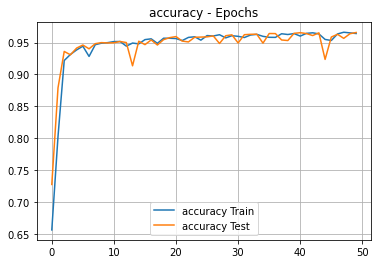

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Pintamos las métricas por epoch
def plot_metric(history, name):
    metric_train = np.array(history.history[name])
    metric_test = np.array(history.history['val_{}'.format(name)])
    acum_avg_metric_train = (np.cumsum(metric_train) / (np.arange(metric_train.shape[-1]) + 1))
    acum_avg_metric_test = (np.cumsum(metric_test) / (np.arange(metric_test.shape[-1]) + 1))
    plt.title('{} - Epochs'.format(name))
    plt.plot(metric_train, label='{} Train'.format(name))
    plt.plot(metric_test, label='{} Test'.format(name))
    plt.grid()
    plt.legend(loc='lower center')
    plt.show()
    
plot_metric(history=history, name='accuracy')

<hr>

### 7. EVALUACIÓN DE LA PRIMERA RED


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Obtenemos las predicciones
y_pred_train = np.argmax(model.predict(X_train), axis=-1)
y_pred_test = np.argmax(model.predict(X_test), axis=-1)

print("\nAccuracy train: {:.4f}".format(accuracy_score(y_true=y_train, y_pred=y_pred_train)))
print("Accuracy test: {:.4f}".format(accuracy_score(y_true=y_test, y_pred=y_pred_test)))
print("Precision train: {:.4f}".format(precision_score(y_true=y_train, y_pred=y_pred_train, average='macro')))
print("Precision test: {:.4f}".format(precision_score(y_true=y_test, y_pred=y_pred_test, average='macro')))
print("Recall train: {:.4f}".format(recall_score(y_true=y_train, y_pred=y_pred_train, average='macro')))
print("Recall test: {:.4f}".format(recall_score(y_true=y_test, y_pred=y_pred_test, average='macro')))
print("F1 train: {:.4f}".format(f1_score(y_true=y_train, y_pred=y_pred_train, average='macro')))
print("F1 test: {:.4f}".format(f1_score(y_true=y_test, y_pred=y_pred_test, average='macro')))


Accuracy train: 0.9668
Accuracy test: 0.9659
Precision train: 0.9684
Precision test: 0.9666
Recall train: 0.9553
Recall test: 0.9560
F1 train: 0.9614
F1 test: 0.9609


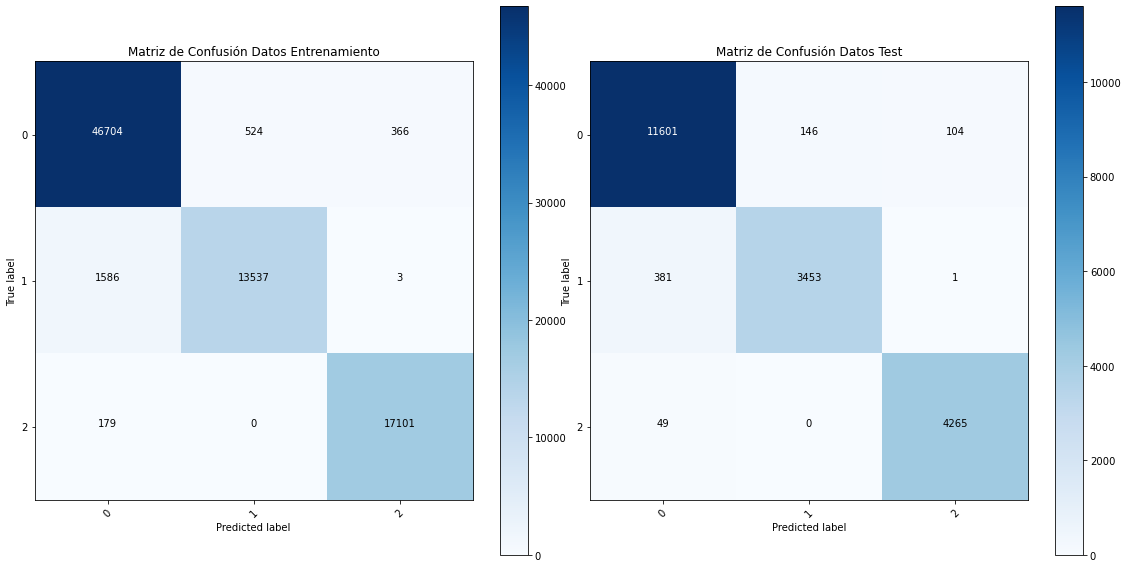

In [15]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

# Definimos el heatmap de la matriz de confusión
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{}'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Obtenemos las matrices de confusión   
cfm_train = confusion_matrix(y_true=y_train, y_pred=y_pred_train)
cfm_test = confusion_matrix(y_true=y_test, y_pred=y_pred_test)

# Pintamos las matrices de confusión
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_confusion_matrix(cfm_train, classes=[i for i in range(3)], title='Matriz de Confusión Datos Entrenamiento')
plt.subplot(1, 2, 2)
plot_confusion_matrix(cfm_test, classes=[i for i in range(3)], title='Matriz de Confusión Datos Test')
plt.show()

<hr>

## SEGUNDA RED NEURONAL

Se va realizar una segunda arquitectura, empleando class weights, regularización L2 y capas Dropout



<hr>

### 8. OBTENCIÓN DE CLASS WEIGHTS



In [16]:
import numpy as np

num_class_0 = np.count_nonzero(y_train == 0)
num_class_1 = np.count_nonzero(y_train == 1)
num_class_2 = np.count_nonzero(y_train == 2)
num_total = len(y_train)
weight_0 = (1 / num_class_0) * (num_total / 2.0)
weight_1 = (1 / num_class_1) * (num_total / 2.0)
weight_2 = (1 / num_class_2) * (num_total / 2.0)

class_weight = {0: weight_0, 1: weight_1, 2: weight_2}

print('Elementos Clase 0: {} - Peso de la clase 0: {:.2f}'.format(num_class_0, weight_0))
print('Elementos Clase 1: {} - Peso de la clase 1: {:.2f}'.format(num_class_1, weight_1))
print('Elementos Clase 1: {} - Peso de la clase 2: {:.2f}'.format(num_class_2, weight_2))

Elementos Clase 0: 47594 - Peso de la clase 0: 0.84
Elementos Clase 1: 15126 - Peso de la clase 1: 2.64
Elementos Clase 1: 17280 - Peso de la clase 2: 2.31


<hr>

### 9. ARQUITECTURA DE LA SEGUNDA RED NEURONAL



In [24]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten

model2 = Sequential()
model2.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model2.add(Dense(128, activation='relu'))#, kernel_regularizer=regularizers.l2(0.01)))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.15))
model2.add(Dense(3, activation='softmax'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               3328      
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_17 (Dense)            (None, 3)                

<hr>

### 10. DEFINICIÓN DE LA FUNCIÓN DE PÉRDIDA Y OPTIMIZADOR DE LA SEGUNDA RED NEURONAL



In [25]:
from tensorflow.keras import metrics

model2.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

<hr>

### 11. ENTRENAMIENTO DE LA SEGUNDA RED NEURONAL



In [26]:
history = model2.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test), 
                    epochs=50, 
                    batch_size=int(X_train.shape[0]/100),
                    class_weight = class_weight,
                    verbose=2)

Epoch 1/50
100/100 - 1s - loss: 1.0803 - accuracy: 0.5921 - val_loss: 0.4301 - val_accuracy: 0.8677 - 867ms/epoch - 9ms/step
Epoch 2/50
100/100 - 0s - loss: 0.4837 - accuracy: 0.8690 - val_loss: 0.2826 - val_accuracy: 0.9183 - 380ms/epoch - 4ms/step
Epoch 3/50
100/100 - 0s - loss: 0.3797 - accuracy: 0.9088 - val_loss: 0.2407 - val_accuracy: 0.9306 - 395ms/epoch - 4ms/step
Epoch 4/50
100/100 - 0s - loss: 0.3493 - accuracy: 0.9204 - val_loss: 0.4742 - val_accuracy: 0.8059 - 399ms/epoch - 4ms/step
Epoch 5/50
100/100 - 0s - loss: 0.4131 - accuracy: 0.9008 - val_loss: 0.2404 - val_accuracy: 0.9287 - 369ms/epoch - 4ms/step
Epoch 6/50
100/100 - 0s - loss: 0.2989 - accuracy: 0.9364 - val_loss: 0.1947 - val_accuracy: 0.9470 - 380ms/epoch - 4ms/step
Epoch 7/50
100/100 - 0s - loss: 0.2842 - accuracy: 0.9406 - val_loss: 0.1991 - val_accuracy: 0.9459 - 384ms/epoch - 4ms/step
Epoch 8/50
100/100 - 0s - loss: 0.2762 - accuracy: 0.9430 - val_loss: 0.2765 - val_accuracy: 0.9179 - 353ms/epoch - 4ms/step


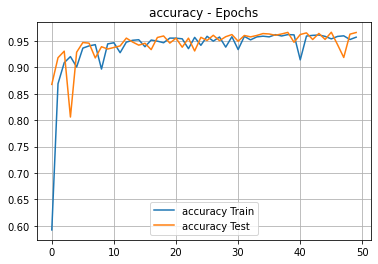

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Pintamos las métricas por epoch
def plot_metric(history, name):
    metric_train = np.array(history.history[name])
    metric_test = np.array(history.history['val_{}'.format(name)])
    acum_avg_metric_train = (np.cumsum(metric_train) / (np.arange(metric_train.shape[-1]) + 1))
    acum_avg_metric_test = (np.cumsum(metric_test) / (np.arange(metric_test.shape[-1]) + 1))
    plt.title('{} - Epochs'.format(name))
    plt.plot(metric_train, label='{} Train'.format(name))
    plt.plot(metric_test, label='{} Test'.format(name))
    plt.grid()
    plt.legend(loc='lower center')
    plt.show()
    
plot_metric(history=history, name='accuracy')

<hr>

### 12. EVALUACIÓN DE LA SEGUNDA RED



In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Obtenemos las predicciones
y_pred_train = np.argmax(model2.predict(X_train), axis=-1)
y_pred_test = np.argmax(model2.predict(X_test), axis=-1)

print("\nAccuracy train: {:.4f}".format(accuracy_score(y_true=y_train, y_pred=y_pred_train)))
print("Accuracy test: {:.4f}".format(accuracy_score(y_true=y_test, y_pred=y_pred_test)))
print("Precision train: {:.4f}".format(precision_score(y_true=y_train, y_pred=y_pred_train, average='macro')))
print("Precision test: {:.4f}".format(precision_score(y_true=y_test, y_pred=y_pred_test, average='macro')))
print("Recall train: {:.4f}".format(recall_score(y_true=y_train, y_pred=y_pred_train, average='macro')))
print("Recall test: {:.4f}".format(recall_score(y_true=y_test, y_pred=y_pred_test, average='macro')))
print("F1 train: {:.4f}".format(f1_score(y_true=y_train, y_pred=y_pred_train, average='macro')))
print("F1 test: {:.4f}".format(f1_score(y_true=y_test, y_pred=y_pred_test, average='macro')))


Accuracy train: 0.9677
Accuracy test: 0.9660
Precision train: 0.9625
Precision test: 0.9598
Recall train: 0.9636
Recall test: 0.9633
F1 train: 0.9630
F1 test: 0.9615


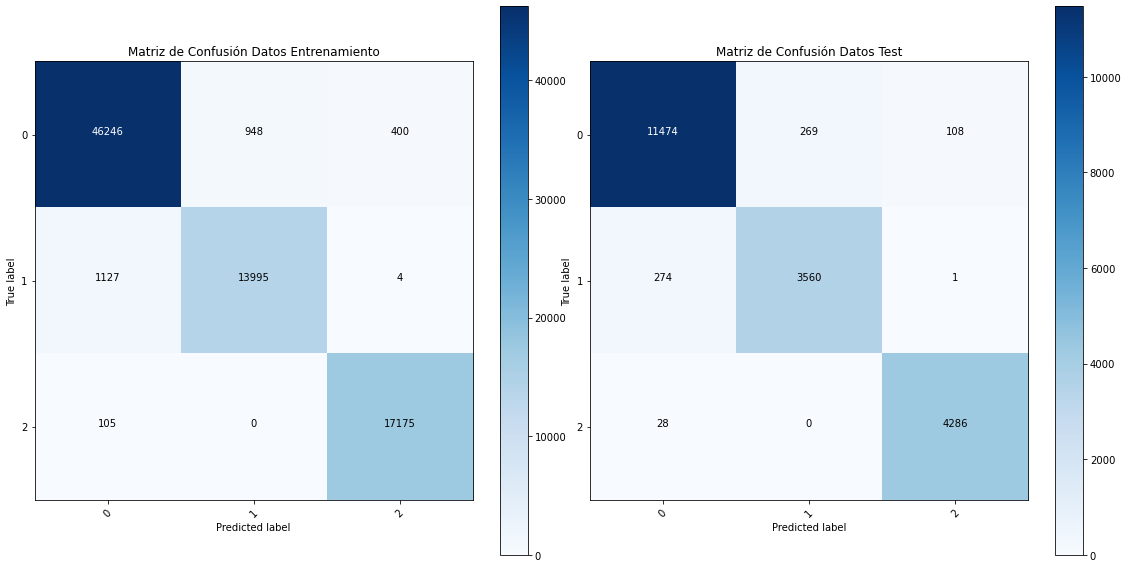

In [29]:
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{}'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Obtenemos las matrices de confusión   
cfm_train = confusion_matrix(y_true=y_train, y_pred=y_pred_train)
cfm_test = confusion_matrix(y_true=y_test, y_pred=y_pred_test)

# Pintamos las matrices de confusión
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_confusion_matrix(cfm_train, classes=[i for i in range(3)], title='Matriz de Confusión Datos Entrenamiento')
plt.subplot(1, 2, 2)
plot_confusion_matrix(cfm_test, classes=[i for i in range(3)], title='Matriz de Confusión Datos Test')
plt.show()

<hr>

### 13. CONCLUSIONES



* El conjunto de datos empleado tiene un gran desbalanceo de las clases a predecir, por lo que deberían utilizarse técnicas de balanceo, como puede ser el uso de class weights.
* Todas las columnas del dataset son de tipo numérico excepto la clase a predecir, por lo que se tiene que utilizar un LabelEncoder para pasar de una etiqueta de texto a una etiqueta numérica para poder emplear los modelos.
* Se ha eliminado la columna 'spec_obj_ID' puesto que para los 100000 datos, tiene 100000 valores diferentes, por lo que parece ser un identificador del dato.
* La mayor diferencia con respecto a modelos de scikit-learn es la necesidad de normalizar previamente, pues tensorflow no se encarga de normalizar, y esto permite que todos los datos estén en la misma escala.
* La primera red neuronal, sin aplicar regularización ni técnicas de balanceo de clases obtiene unos resultados excelentes, con una precisión en el test del 96.59%, y un F1 elevado, del 96.09% , por lo que es capaz de distinguir las distintas clases, en vez de apostar por la clase mayoritaria, a pesar del desbalanceo. La matriz de confusión de la red corrobora esto.
* En el segundo modelo, se ha aplicado regularización L2 y se han utilizado class weights y una capa de dropout, con el objetivo de mejorar el modelo y de evitar que pueda ocurrir overfitting. Pese a ello, no se ha obtenido una mejora considerable, teniendo un accuracy en el conjunto de test del 96.60%, es decir, solo mejora un 0.01%, pudiendo considerar esta mejora como insignificante.
* A pesar de los buenos resultados, se obtenían mejores resultados con árboles de decisión o con métodos ensemble.
* La poca mejora de la precisión del segundo modelo respecto al primero, pues casi coinciden, se puede deber a que el dataset tiene los suficientes datos para realizar el entrenamiento sin overfitting, y que a pesar de estar desbalanceados, las distintas clases tienen propiedades muy diferentes entre sí, pudiendo el modelo aprender a distinguirlas sin necesidad de class weights.

<hr>

### 14. PREDICCIÓN CON LAS REDES NEURONALES



In [30]:
pred = np.argmax(model.predict(X), axis=-1)
pred2 = np.argmax(model2.predict(X), axis=-1)
dataframe['PredNN1'] = pred
dataframe['PredNN2'] = pred2
dataframe.head(15)

,alpha,delta,u,g,r,i,z,field_ID,redshift,plate,MJD,fiber_ID,class,PredNN,PredNN1,PredNN2
0,0.376905,0.503802,0.999113,0.999070,0.535344,0.427665,0.998944,0.069530,0.091831,0.451592,0.648007,0.170170,0,0,0,0
1,0.402286,0.491812,0.999202,0.999126,0.646203,0.515986,0.999225,0.110429,0.112389,0.828841,0.894320,0.426426,0,0,0,0
2,0.394960,0.534139,0.999251,0.999109,0.546218,0.435729,0.998959,0.111452,0.093170,0.350949,0.543965,0.298298,0,0,0,0
3,0.940947,0.180600,0.998939,0.999220,0.596946,0.486717,0.998990,0.207566,0.134210,0.723312,0.878072,0.774775,0,0,0,0
4,0.959118,0.392679,0.998670,0.998602,0.337999,0.287021,0.998620,0.128834,0.017959,0.476753,0.625205,0.841842,0,0,0,0
5,0.947208,0.386840,0.999074,0.999176,0.582279,0.475761,0.999019,0.101227,0.204328,0.387591,0.579874,0.740741,1,1,1,1
6,0.064527,0.296736,0.998872,0.998961,0.562346,0.491292,0.999107,0.461145,0.084946,0.879651,0.935008,0.112112,1,0,0,0
7,0.015077,0.303092,0.998950,0.999045,0.532623,0.441877,0.998950,0.342536,0.069358,0.481801,0.628345,0.014014,0,0,0,0
8,0.556356,0.648270,0.999165,0.999078,0.546246,0.440860,0.998960,0.099182,0.095423,0.517792,0.652376,0.718719,0,0,0,0
9,0.108736,0.460655,0.998900,0.998847,0.473598,0.412337,0.998930,0.113497,0.001419,0.177347,0.337794,0.231231,2,2,2,2


In [35]:
df_coincidente = dataframe.loc[dataframe['PredNN1'] == dataframe['PredNN2']]
print(f"De los 100000 datos, el valor que predicen los modelos coinciden en {df_coincidente.shape[0]} casos")

De los 100000 datos, el valor que predicen los modelos coinciden en 98524 casos
